A certain university wants to understand the relationship between students’ SAT scores and their GPA. Build a Simple Linear Regression model with GPA as the target variable and record the RMSE and correlation coefficient values for different models.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import scipy
import warnings
warnings.filterwarnings(action='ignore',category=UserWarning)

In [2]:
# Importing dataset
data = pd.read_csv('C:/Users/vaibh/Desktop/360 Digitmg/SImple Regression\Asssignments/SAT_GPA.csv')
data.head()

SAT_Scores  GPA
0         206  2.3
1         214  2.4
2         717  3.5
3         580  2.8
4         404  2.6

In [3]:
# checking dimensions of the dataset
data.shape

(200, 2)

In [4]:
# checking for null values
data.isnull().sum()

SAT_Scores    0
GPA           0
dtype: int64

There are no null values

In [5]:
# checking for duplicate value
data.duplicated().sum()

2

There are 2 duplicate values

In [6]:
data.drop_duplicates(ignore_index=True, inplace=True)

In [7]:
# Descriptive statistics of the dataset
data.describe().T

count        mean         std    min     25%    50%    75%    max
SAT_Scores  198.0  493.843434  174.423025  202.0  351.25  481.5  644.5  797.0
GPA         198.0    2.846970    0.538626    2.0    2.40    2.8    3.4    3.9

In [8]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT_Scores  198 non-null    int64  
 1   GPA         198 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


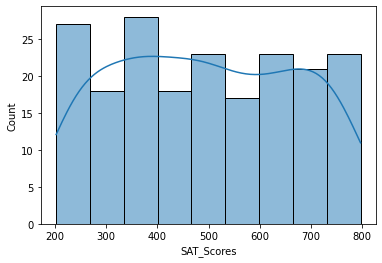

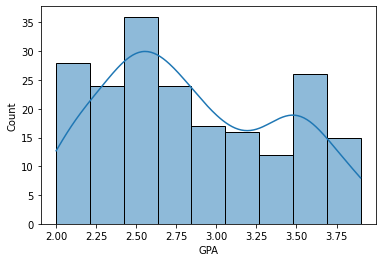

In [9]:
# Plotting histogram to check distribution of the features
sns.histplot(data['SAT_Scores'],kde=1);plt.show()
sns.histplot(data['GPA'],kde=1);plt.show()

The data seems to be slighly right skewed

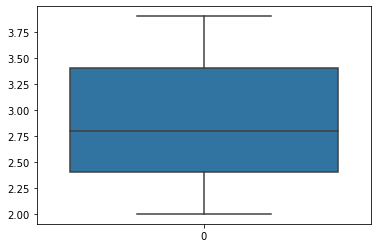

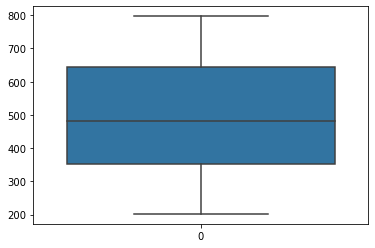

In [10]:
# Checking for outliers
sns.boxplot(data = data.GPA); plt.show()
sns.boxplot(data = data.SAT_Scores); plt.show()

There are no outliers in the dataset

<AxesSubplot:xlabel='GPA', ylabel='SAT_Scores'>

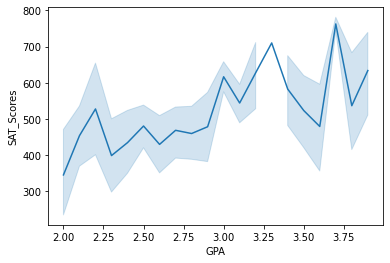

In [11]:
# Lineplot 
sns.lineplot(y = data['SAT_Scores'], x = data['GPA'])

In [12]:
# Correlation between the features
data.corr()

SAT_Scores       GPA
SAT_Scores    1.000000  0.298389
GPA           0.298389  1.000000

There is low correlation between the SAT Scores and GPA

# MODEL 1

In [13]:
# importing statsmodels for Simple Linear Regression

import statsmodels.formula.api as smf

model = smf.ols('GPA ~ SAT_Scores',data = data).fit()    # fiting the data to OLS model

In [14]:
# Summary of the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     19.16
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           1.96e-05
Time:                        15:18:18   Log-Likelihood:                -148.71
No. Observations:                 198   AIC:                             301.4
Df Residuals:                     196   BIC:                             308.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3919      0.110     21.699      0.000       2.175       2.609
SAT_Scores     0.0009      0.000      4.377      0.000       0.001       0.001
==============================================================================
Omnibus:                       11.942   Durbin-Watson:                   1.352
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.209
Skew:                           0.307   Prob(JB):                       0.0272
Kurtosis:                       2.295   Cond. No.                     1.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We get an R-squared value of 0.089

In [15]:
# Predicting the Weight based on the model 
pred1 = model.predict(data.SAT_Scores)
pred1

0      2.581740
1      2.589111
2      3.052595
3      2.926358
4      2.764185
         ...   
193    2.860936
194    2.821314
195    3.012051
196    3.074709
197    2.630576
Length: 198, dtype: float64

In [16]:
# RMSE Error calculation (Model-1)

res1 = data.GPA - pred1
rmse1 = np.sqrt(np.mean(res1 * res1))

r_sqared1 = model.rsquared  
print(f'\nR-Squared value for model 1 : {r_sqared1}')
print(f'\nRMSE for model 1 : {rmse1}')


R-Squared value for model 1 : 0.08903607347445475

RMSE for model 1 : 0.5127884107057588


# MODEL 2

Using log of x

In [17]:
model2 = smf.ols('GPA ~ np.log(SAT_Scores)',data = data).fit()
summary2 = model2.summary() ; print(summary2)                    # Model summary 
r_sqared2 = model2.rsquared                                      # Model r-squared value

pred2 = model2.predict(data.SAT_Scores)                            # Using the model to predict 

res2 = data.GPA - pred2                                       # Calculating Error between actual and predicted 
rmse2 = np.sqrt(np.mean(res2 * res2))
print(f'\nR-Squared value for model 2 : {r_sqared2}')
print(f'\nRMSE for model 2 : {rmse2}')

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     16.71
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           6.36e-05
Time:                        15:18:18   Log-Likelihood:                -149.84
No. Observations:                 198   AIC:                             303.7
Df Residuals:                     196   BIC:                             310.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4508      0

# MODEL 3

Using log of y and log of x

In [18]:
model3 = smf.ols('np.log(GPA) ~ np.log(SAT_Scores)',data = data).fit()
summary3 = model3.summary() ; print(summary3)                    # Model summary 
r_sqared3 = model3.rsquared                                      # Model r-squared value

pred3 = np.exp(model3.predict(data.SAT_Scores))                       # Using the model to predict 

res3 = data.GPA - pred3                                       # Calculating Error between actual and predicted 
rmse3 = np.sqrt(np.mean(res3 * res3))
print(f'\nR-Squared value for model 3 : {r_sqared3}')
print(f'\nRMSE for model 3 : {rmse3}')

                            OLS Regression Results                            
Dep. Variable:            np.log(GPA)   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     17.09
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           5.28e-05
Time:                        15:18:18   Log-Likelihood:                 57.996
No. Observations:                 198   AIC:                            -112.0
Df Residuals:                     196   BIC:                            -105.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1802      0

# MODEL 4

Using polynomial relationship between x and y

In [19]:
model4 = smf.ols('np.log(GPA) ~ SAT_Scores + I(SAT_Scores * SAT_Scores)',data = data).fit()
summary4 = model4.summary() ; print(summary4)                    # Model summary 
r_sqared4 = model4.rsquared                                      # Model r-squared value

pred4 = np.exp(model4.predict(data.SAT_Scores))                       # Using the model to predict 

res4 = data.GPA - pred4                                       # Calculating Error between actual and predicted 
rmse4 = np.sqrt(np.mean(res4 * res4))
print(f'\nR-Squared value for model 4 : {r_sqared4}')
print(f'\nRMSE for model 4 : {rmse4}')

                            OLS Regression Results                            
Dep. Variable:            np.log(GPA)   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     10.62
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           4.19e-05
Time:                        15:18:18   Log-Likelihood:                 59.954
No. Observations:                 198   AIC:                            -113.9
Df Residuals:                     195   BIC:                            -104.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

# MODEL 5

Using log of y with x

In [20]:
model5 = smf.ols('np.log(GPA) ~ SAT_Scores',data = data).fit()
summary5 = model5.summary() ; print(summary5)                    # Model summary 
r_sqared5 = model5.rsquared                                      # Model r-squared value

pred5 = np.exp(model5.predict(data.SAT_Scores))                       # Using the model to predict 

res5 = data.GPA - pred5                                       # Calculating Error between actual and predicted 
rmse5 = np.sqrt(np.mean(res5 * res5))
print(f'\nR-Squared value for model 5 : {r_sqared5}')
print(f'\nRMSE for model 5 : {rmse5}')

                            OLS Regression Results                            
Dep. Variable:            np.log(GPA)   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     19.13
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           1.98e-05
Time:                        15:18:19   Log-Likelihood:                 58.937
No. Observations:                 198   AIC:                            -113.9
Df Residuals:                     196   BIC:                            -107.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8692      0.039     22.505      0.0

In [21]:
# Comparing R-squared and error for each model

results = pd.DataFrame([],index =['R-Squared', 'RMSE'])
results['Model_1'] = r_sqared1, rmse1
results['Model_2'] = r_sqared2, rmse2
results['Model_3'] = r_sqared3, rmse3
results['Model_4'] = r_sqared4, rmse4
results['Model_5'] = r_sqared5, rmse5
results.T

R-Squared      RMSE
Model_1   0.089036  0.512788
Model_2   0.078551  0.515731
Model_3   0.080202  0.517381
Model_4   0.098220  0.510652
Model_5   0.088910  0.514352

Model_4 with oplynomial relationship is the best model with the highest R-squared value and has low RMSE

In [22]:
# Using train test split

from sklearn import model_selection

train, test = model_selection.train_test_split(data, test_size = 0.2)

In [23]:
# Using the best model (Model_1)
# Fitting the train data to the model

best_model = smf.ols('np.log(GPA) ~ SAT_Scores + I(SAT_Scores * SAT_Scores)' ,data = train).fit()

In [24]:
# Predicting for test data
best_pred_test = np.exp(best_model.predict(test.SAT_Scores))
best_pred_test

196    3.080505
64     3.070407
135    3.166636
47     2.769911
146    2.912225
14     2.694656
37     2.663774
67     2.903188
175    2.666390
190    2.659303
125    2.724358
36     2.692347
43     2.652006
115    3.035238
19     2.879965
70     2.714044
137    2.651573
149    2.659056
103    2.885653
51     2.729822
113    2.658092
114    2.707841
60     3.068404
105    2.656796
134    2.651485
97     3.201471
157    2.652627
53     3.094888
162    2.860669
161    3.099050
21     2.765995
20     2.729029
106    2.652337
12     2.689005
174    2.652951
15     2.656796
98     3.029555
108    2.653568
59     2.658813
144    3.086634
dtype: float64

In [25]:
# RMSE Error calculation for test data

res_test = test.GPA - best_pred_test
rmse_test = np.sqrt(np.mean(res_test * res_test))

r_sqared_test = best_model.rsquared  
print(f'\nR-Squared value for test data : {r_sqared_test}')
print(f'\nRMSE for test data : {rmse_test}')


R-Squared value for test data : 0.08610290335058679

RMSE for test data : 0.505653838696831


In [26]:
# Predicting for train data
best_pred_train = np.exp(best_model.predict(train.SAT_Scores))

# RMSE Error calculation for train data

res_train = train.GPA - best_pred_train
rmse_train = np.sqrt(np.mean(res_train * res_train))

r_sqared_train = best_model.rsquared  
print(f'\nR-Squared value for train data : {r_sqared_train}')
print(f'\nRMSE for train data : {rmse_train}')


R-Squared value for train data : 0.08610290335058679

RMSE for train data : 0.5120737408686814


All the models gave very low R-squared value of 0.1 indicating the model explains only 10% of variation within the data.

Using polynomial relationship model, we can see that the train and test data have the same rsquared value and very low RMSE values.

This model thus can be used to describe the relationshp between SAT_scores and GPA